XGBoost

i:\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:53:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
i:\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:53:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
i:\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:53:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
i:\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:53:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
i:\Python313\Lib\sit

Test Accuracy: 0.8666666666666667
ROC AUC Score: 0.9499443826473859
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.88        31
           1       0.89      0.83      0.86        29

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60

Final Test Accuracy: 0.8666666666666667


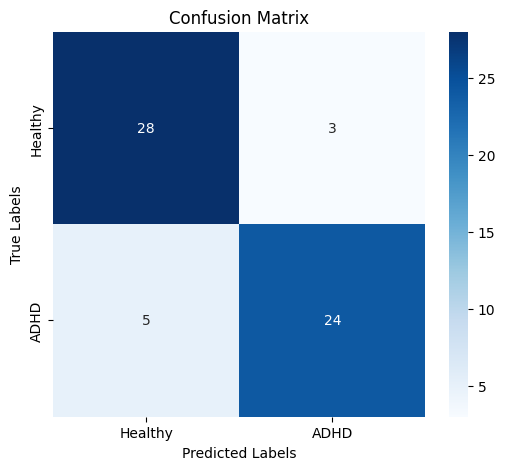

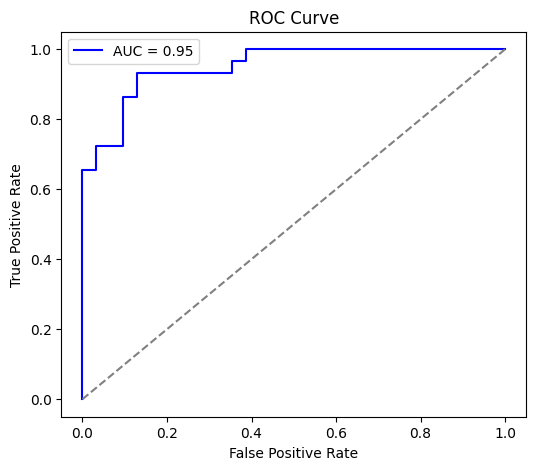

In [4]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from joblib import dump
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import roc_curve, auc


def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()




def plot_roc_curve(y_true, y_probs):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color="grey", linestyle="--")  # Diagonal line

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()




# Load your dataset
df = pd.read_csv("I:/adhd/datasets/combined_featuresECEO.csv")  # Update with your dataset

# Splitting features and target
X = df.drop(columns=['ADHD'])  # Replace 'target' with your actual column name
y = df['ADHD']

# Apply SMOTE for class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Feature Scaling
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Feature Selection with RFECV (Recursive Feature Elimination with Cross-Validation)
base_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
selector = RFECV(base_model, step=1, cv=3, scoring='accuracy', n_jobs=-1)
X_selected = selector.fit_transform(X_resampled, y_resampled)

# Get the selected feature names
selected_features = X.columns[selector.support_]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)

best_model = XGBClassifier(n_estimators = 482, max_depth = 3, learning_rate = 0.13935875596020206, subsample = 0.5729662857123876, colsample_bytree = 0.9877896868094707, gamma = 0.013941617298173203, reg_lambda = 2.4184265811835517, reg_alpha = 0.009996904274154051, use_label_encoder=False, eval_metric="logloss", random_state=42)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Evaluate on Test Data
accuracy = best_model.score(X_test, y_test)
print("Final Test Accuracy:", accuracy)


# Confusion Matrix
plot_confusion_matrix(y_test, y_pred, class_names=["Healthy", "ADHD"])

# ROC Curve
plot_roc_curve(y_test, y_proba)

SVM

i:\Python313\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [100.0, np.str_('balanced'), 10.0, np.str_('linear')] before, using random point [0.01576038628268736, None, 0.012467606170072608, 'poly']
  warnings.warn(
i:\Python313\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [100.0, np.str_('balanced'), 10.0, np.str_('linear')] before, using random point [0.02154521691486238, 'balanced', 0.3561769581993099, 'poly']
  warnings.warn(
i:\Python313\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [100.0, np.str_('balanced'), 10.0, np.str_('linear')] before, using random point [0.03496103561993702, 'balanced', 0.0027005828056458773, 'rbf']
  warnings.warn(
i:\Python313\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [100.0, np.str_('balanced'), 10.0, np.str_

Best Hyperparameters: OrderedDict({'C': 100.0, 'class_weight': 'balanced', 'gamma': 1.1965005081760534, 'kernel': 'rbf'})
Test Accuracy: 0.5918367346938775
ROC AUC Score: 0.48596491228070177
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.05      0.09        19
           1       0.61      0.93      0.74        30

    accuracy                           0.59        49
   macro avg       0.47      0.49      0.41        49
weighted avg       0.50      0.59      0.49        49



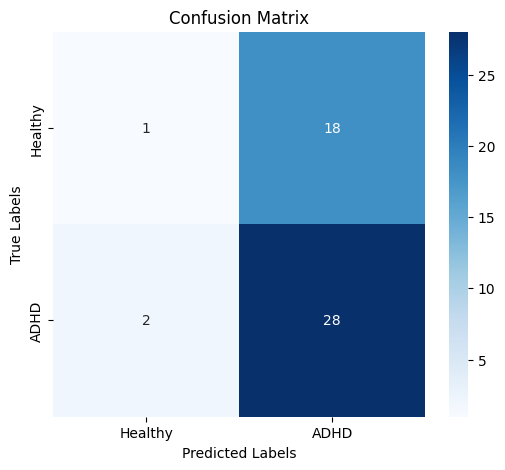

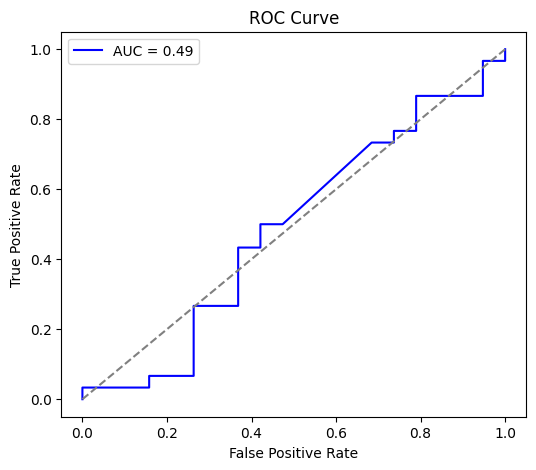

In [5]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from skopt import BayesSearchCV
from skopt.space import Real, Categorical
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()




def plot_roc_curve(y_true, y_probs):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color="grey", linestyle="--")  # Diagonal line

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

# Load dataset (replace with your actual dataframe)
df = pd.read_csv("I:/adhd/datasets/combined_featuresECEO.csv")  # Ensure 'label' column contains target values

# Separate features and target
X = df.drop(columns=['ADHD'])  # Feature columns
y = df['ADHD']  # Target column

# Split dataset before applying SMOTE (to prevent data leakage)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)


# Apply SMOTE to training data only
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_smote_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define SVM model
svm = SVC(probability=True, random_state=42)

# Define search space for Bayesian Optimization
search_space = {
    'C': Real(1e-3, 100, prior='log-uniform'),  # Regularization parameter
    'gamma': Real(1e-4, 10, prior='log-uniform'),  # Kernel coefficient
    'kernel': Categorical(['linear', 'rbf', 'poly', 'sigmoid']),  # Kernel type
    'class_weight': Categorical([None, 'balanced'])  # Handling class imbalance
}

# Perform Bayesian Optimization
bayes_search = BayesSearchCV(
    svm, search_space, 
    n_iter=50,  # Number of parameter evaluations
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1, 
    random_state=42
)
bayes_search.fit(X_train_smote, y_train_smote)

# Get the best model
best_model = bayes_search.best_estimator_
print("Best Hyperparameters:", bayes_search.best_params_)

# Evaluate on test set
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plot_confusion_matrix(y_test, y_pred, class_names=["Healthy", "ADHD"])

# ROC Curve
plot_roc_curve(y_test, y_proba)

